In [1]:
from src.sga import SGA
from src.fitnessfunction import ObjectiveSine, ObjectiveLinReg
from src.lin_reg import LinReg
import numpy as np
import matplotlib.pyplot as plot

## Sine fitness function

In [2]:
def plot_sin(population):
    # Sine wave
    x1 = np.arange(1, 128, 0.1)
    y1 = np.sin(x1)

    # Individuals
    x2 = [individual.value for individual in population.individuals]
    y2 = [individual.fitness for individual in population.individuals]

    plot.plot(x1, y1)
    plot.scatter(x2, y2)
    plot.show()

### Run simulation, maximize.

In [3]:
params_sine = {
    "objective_function": ObjectiveSine().get_fitness,
    "maximize": True,
    "pop_size": 100,
    "individual_size": 15,
    "max_generations": 5,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
}

In [4]:
sga = SGA(**params_sine)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: 0.09229806155696293
Generation 1 avg. fitness: 0.7024952740585099
Generation 2 avg. fitness: 0.8948710862547955
Generation 3 avg. fitness: 0.9541445574351819
Generation 4 avg. fitness: 0.972660204862768
Generation 5 avg. fitness: 0.9879935688230921
[1 0 0 0 1 1 0 1 0 1 0 1 1 1 1] 70.68359375 0.9999974890596685


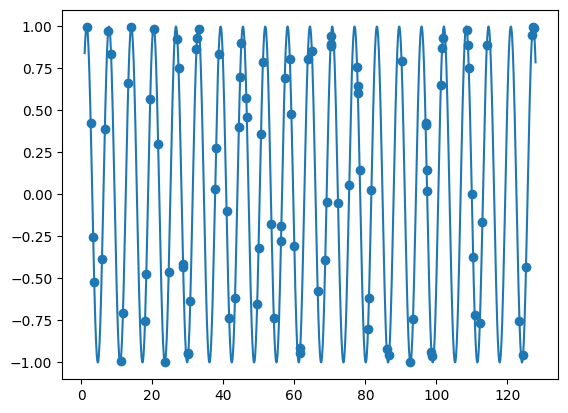

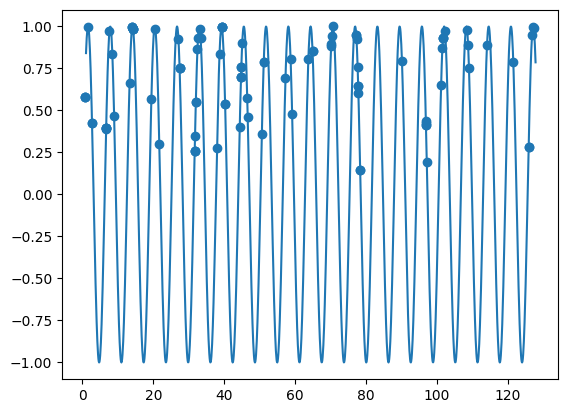

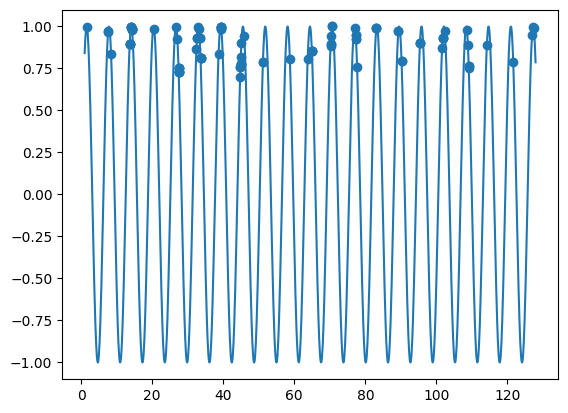

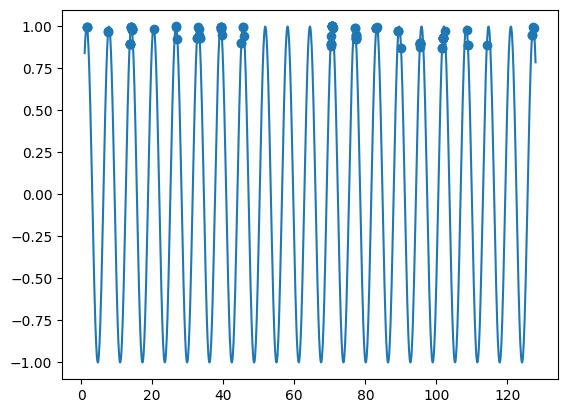

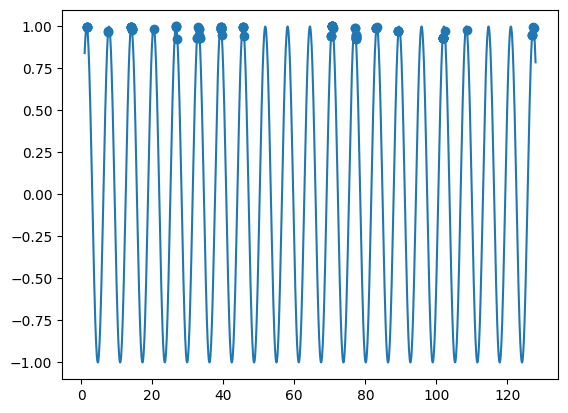

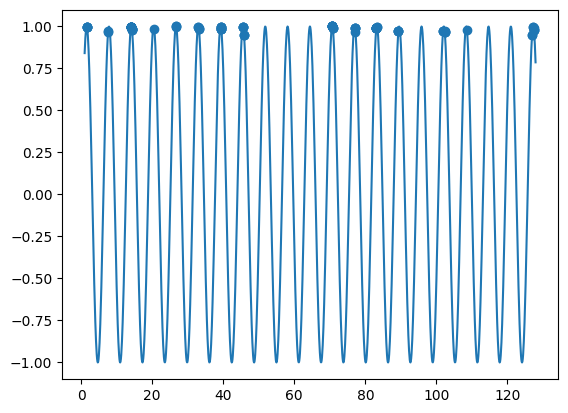

In [5]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

#### Run simulation with constraint

In [6]:
sga = SGA(**params_sine)
sga.simulate()
constraint = [5,10]
solution = sga.get_solution(constraint)

if solution is not None:
    print(solution.bitstring, solution.value, solution.fitness)
else:
    print("Could not find a solution that satisfies the constraint")

Generation 0 avg. fitness: -0.054825028465395935
Generation 1 avg. fitness: 0.7307792712496881
Generation 2 avg. fitness: 0.907528672799514
Generation 3 avg. fitness: 0.967189837853953
Generation 4 avg. fitness: 0.9822202575655566
Generation 5 avg. fitness: 0.987052164191781
Could not find a solution that satisfies the constraint


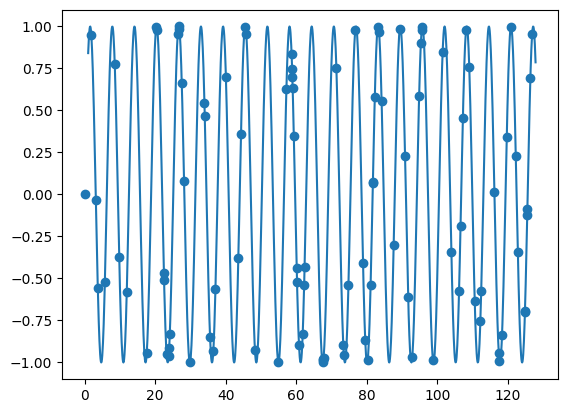

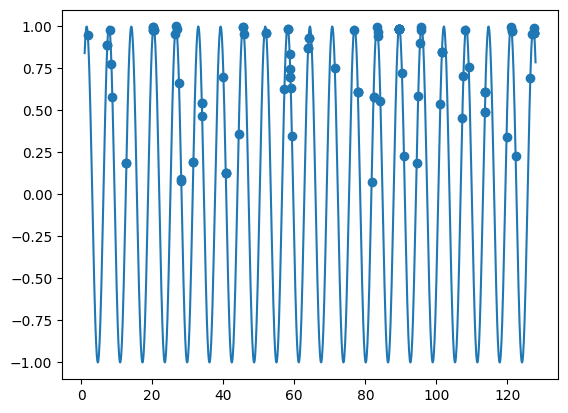

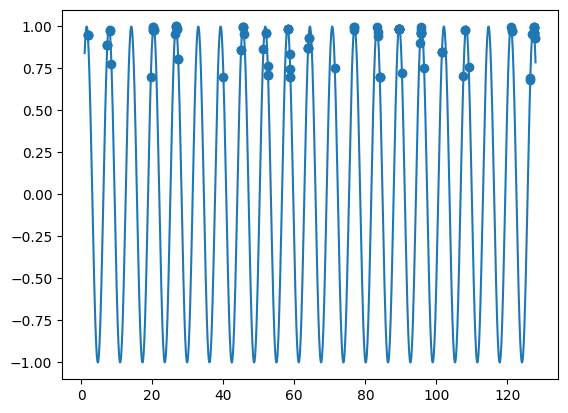

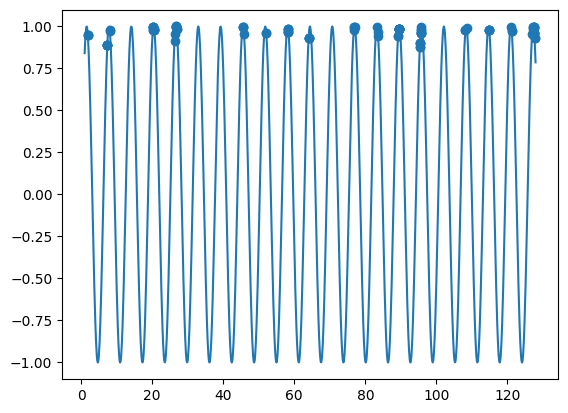

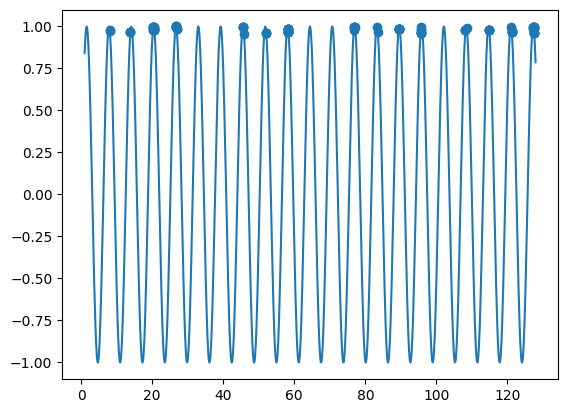

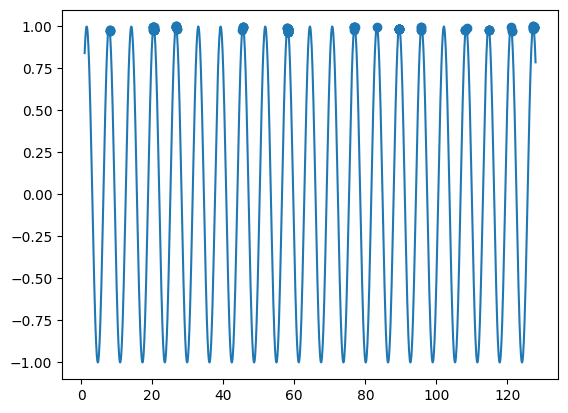

In [7]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

#### Run simulation with constraint and crowding

In [8]:
params_sine = {
    "objective_function": ObjectiveSine().get_fitness,
    "maximize": True,
    "pop_size": 100,
    "individual_size": 15,
    "max_generations": 15,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
    "survivor_selection_type": "restricted_tournament"
}

In [9]:
sga = SGA(**params_sine)
sga.simulate()
constraint = [5,10]
solution = sga.get_solution(constraint)

if solution is not None:
    print(solution.bitstring, solution.value, solution.fitness)
else:
    print("Could not find a solution that satisfies the constraint")

Generation 0 avg. fitness: 0.09111150299040201
Generation 1 avg. fitness: 0.22624357646852647
Generation 2 avg. fitness: 0.3582214778268291
Generation 3 avg. fitness: 0.6224654528458686
Generation 4 avg. fitness: 0.507640768344195
Generation 5 avg. fitness: 0.5764225320886183
Generation 6 avg. fitness: 0.7195306240666547
Generation 7 avg. fitness: 0.6737887138107392
Generation 8 avg. fitness: 0.7344026103316139
Generation 9 avg. fitness: 0.7999040603285787
Generation 10 avg. fitness: 0.7747691779887453
Generation 11 avg. fitness: 0.7524432127406022
Generation 12 avg. fitness: 0.7818717058561272
Generation 13 avg. fitness: 0.7491696322129506
Generation 14 avg. fitness: 0.8051679157969392
Generation 15 avg. fitness: 0.7610675172607516
Could not find a solution that satisfies the constraint


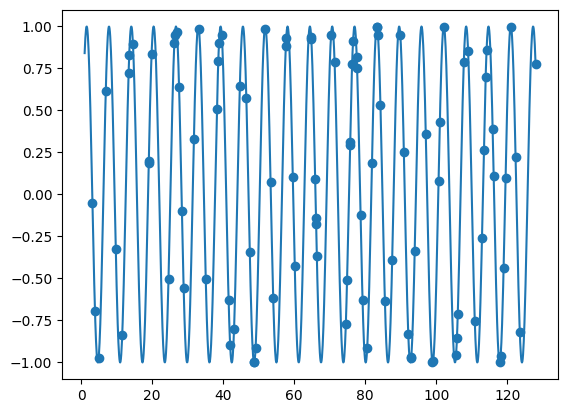

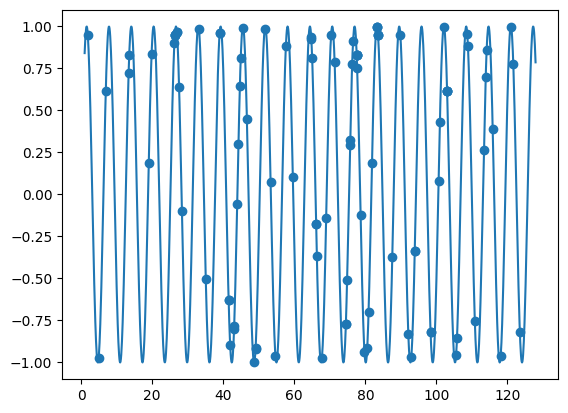

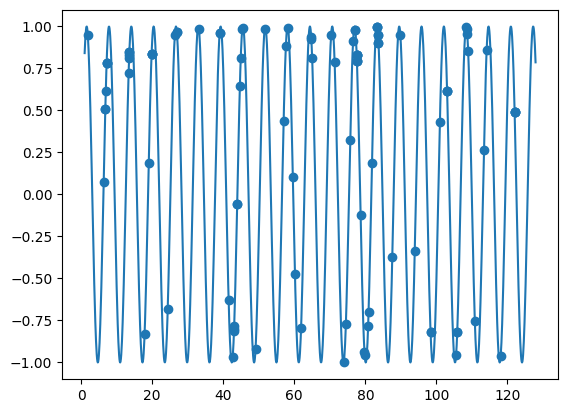

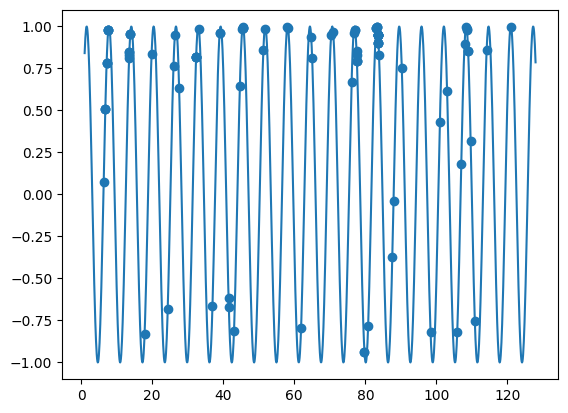

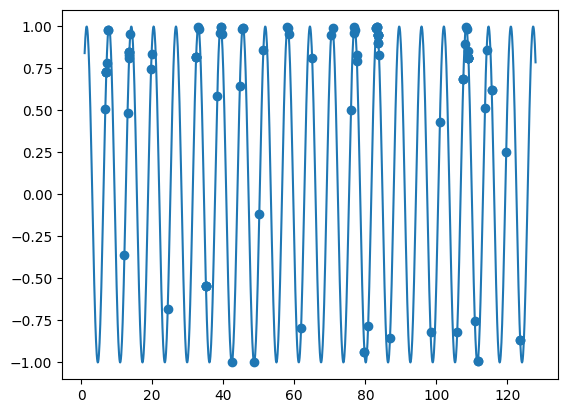

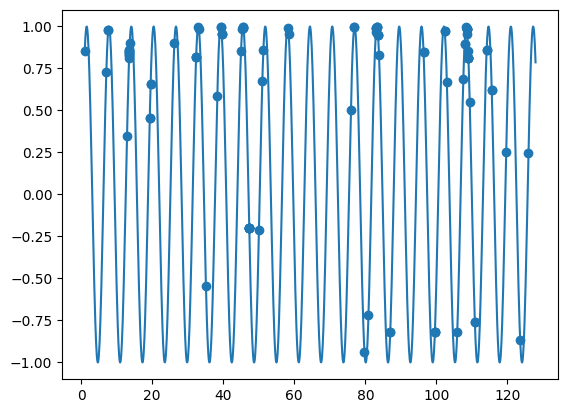

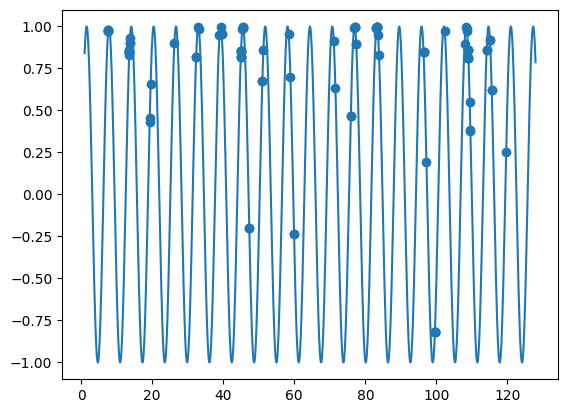

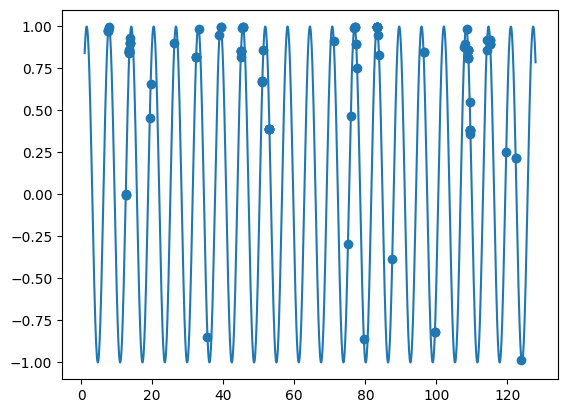

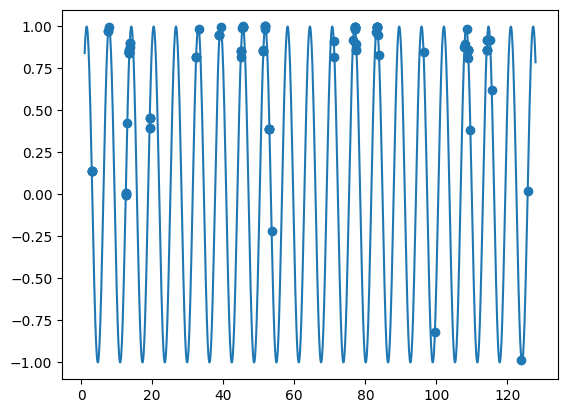

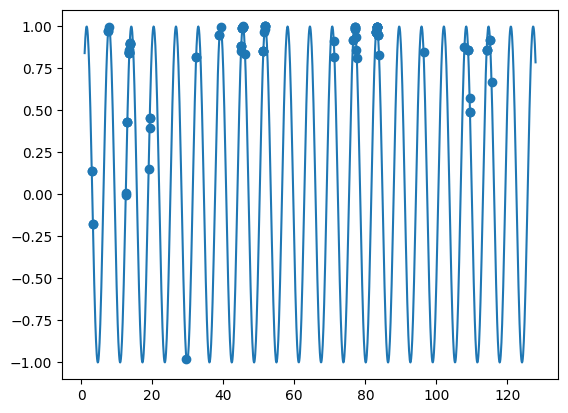

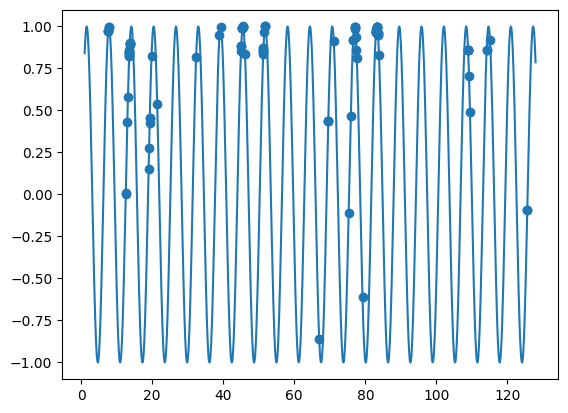

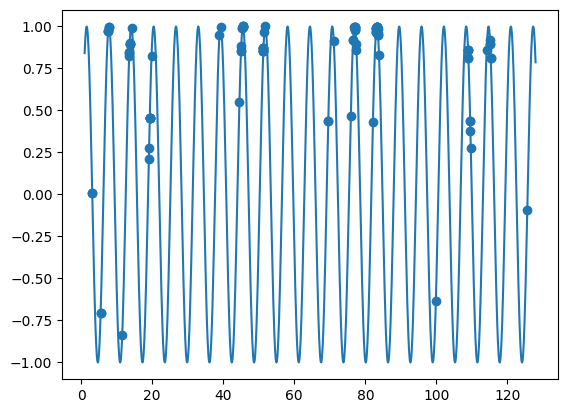

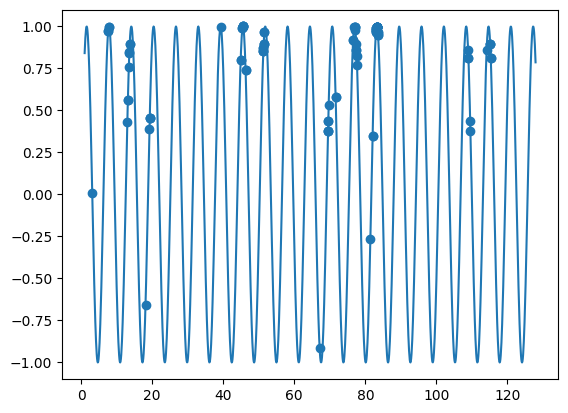

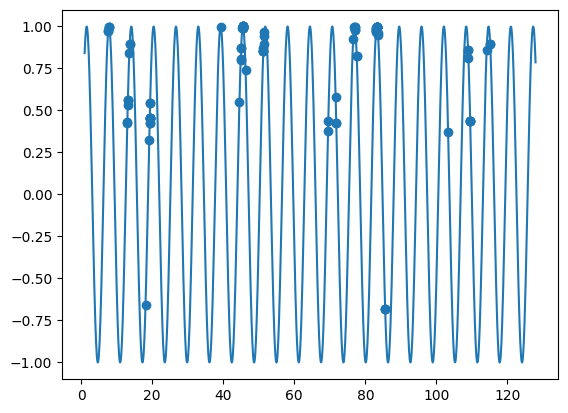

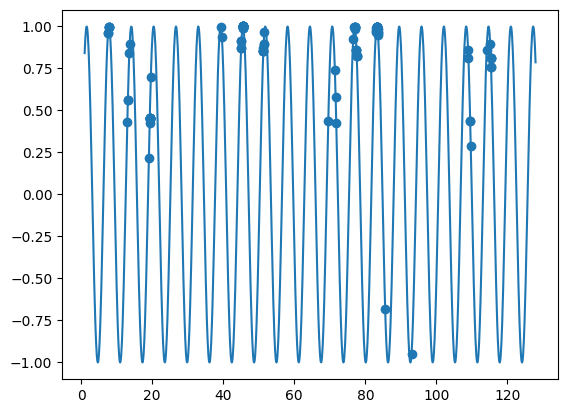

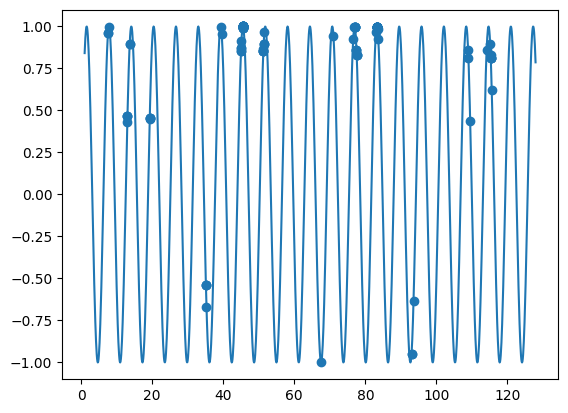

In [10]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

## Linear regression of dataset

In [11]:
# Load dataset
data_path = r"./data/dataset.txt"
df = np.genfromtxt(data_path, delimiter=",")
y = df[:, -1]
X = np.delete(df, -1, axis=1)

seed = 99
# seed = None

### Run the simulation, Minimize

In [12]:
# Run on entire dataset
linreg_err = LinReg().get_fitness(X, y, seed)
print(f"RMSE entire dataset: {linreg_err}")

RMSE entire dataset: 0.13530625063199608


In [13]:
params_linreg = {
    "objective_function": ObjectiveLinReg(X, y, seed=seed).get_fitness,
    "maximize": False,
    "pop_size": 250,
    "individual_size": X.shape[1],
    "max_generations": 30,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
}

In [14]:
sga = SGA(**params_linreg)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: 0.1362981077432248
Generation 1 avg. fitness: 0.13398914975765874
Generation 2 avg. fitness: 0.13243116005973307
Generation 3 avg. fitness: 0.13106888126687752
Generation 4 avg. fitness: 0.12994692556433668
Generation 5 avg. fitness: 0.12893854863449355
Generation 6 avg. fitness: 0.1281133269745206
Generation 7 avg. fitness: 0.12762909406561024
Generation 8 avg. fitness: 0.12715742362328605
Generation 9 avg. fitness: 0.12673199283946063
Generation 10 avg. fitness: 0.12619641656018532
Generation 11 avg. fitness: 0.12559212665903047
Generation 12 avg. fitness: 0.12514932567558976
Generation 13 avg. fitness: 0.12482525283322324
Generation 14 avg. fitness: 0.12447236859778044
Generation 15 avg. fitness: 0.12427284905737536
Generation 16 avg. fitness: 0.12401657202595026
Generation 17 avg. fitness: 0.12387590298087614
Generation 18 avg. fitness: 0.12363960484698935
Generation 19 avg. fitness: 0.12343974042053857
Generation 20 avg. fitness: 0.12325243422354766
Gene

In [15]:
params_linreg = {
    "objective_function": ObjectiveLinReg(X, y, seed=seed).get_fitness,
    "maximize": False,
    "pop_size": 250,
    "individual_size": X.shape[1],
    "max_generations": 30,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
    "survivor_selection_type": "restricted_tournament"
}

In [16]:
sga = SGA(**params_linreg)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: 0.13605904612876676
Generation 1 avg. fitness: 0.13411251664910698
Generation 2 avg. fitness: 0.13246924495348303
Generation 3 avg. fitness: 0.1312950805911445
Generation 4 avg. fitness: 0.1303508170902796
Generation 5 avg. fitness: 0.12979351604119904
Generation 6 avg. fitness: 0.12922267347059763
Generation 7 avg. fitness: 0.12848552772639438
Generation 8 avg. fitness: 0.1279010519247587
Generation 9 avg. fitness: 0.12724895369964523
Generation 10 avg. fitness: 0.12670678904025034
Generation 11 avg. fitness: 0.12621150967299818
Generation 12 avg. fitness: 0.12580615920261745
Generation 13 avg. fitness: 0.12534170887438875
Generation 14 avg. fitness: 0.12487071589696193
Generation 15 avg. fitness: 0.12457289850107686
Generation 16 avg. fitness: 0.12426116790736702
Generation 17 avg. fitness: 0.12404442938144009
Generation 18 avg. fitness: 0.12381707052787802
Generation 19 avg. fitness: 0.1236015761445003
Generation 20 avg. fitness: 0.12339834191825488
Genera